# AutoEncoder(AE)

* 입력데이터의 차원축소를 통해 의미있는 잠재 공간(Latent Space/Manifold)을 학습
 - Encoder 학습을 위해 Decoder를 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Load MNIST Dataset

> ## 1) X_train and X_test

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> ## 2) Normalization and Reshape

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [5]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# II. Keras Modeling with Functional API

> ## 1) 'Latent Space' Size

In [26]:
encoding_dim = 5 #latent Space, 표현할수 있는 크기를 높힐수록 디코딩 수준이 높아 진다.

> ## 2) Encoder

* Input

In [11]:
from tensorflow.keras import layers

input_img = layers.Input(shape = (784, ))

* Encoding Layers and Encoding Model

In [12]:
encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation = 'elu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded)

> ## 3) Decoder

* Decoding Lyaers and Decoding Model

In [13]:
decoded = layers.Dense(128, activation = 'elu')(encoded)
decoded = layers.Dense(256, activation = 'elu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

# III. AutoEncoder Model


<b> AutoEncoder Model </b> <br>

```인코더 파라미터```에 의해 latent space(내부표현)를 생성 <br>
```디코더 파라미터```에 의해 latent space를 ```복원```<br>
이를 위해 ```양쪽 파라미터를 학습```시키는 것이며,<br>
생성보다는 ```복원```의 개념에 가깝다. <br><br>

- 일반적으로 node 수는 <br>
encoder - decoder를 나비모양인 대칭형이 되게 개수를 맞춰 사용

- 활용1. 디코더를 통해 원본을 복원할 수 있어, 노이즈를 제거 후 원복 


- 활용2. 주성분분석 (차원축소) 


> ## 1) 'autoencoder' Model

In [14]:
from tensorflow.keras import models

autoencoder = models.Model(input_img, decoded)

In [15]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
 dense_9 (Dense)             (None, 128)               768       
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 784)               201488

> ## 2) 'encoder' Model

In [16]:
encoder = models.Model(input_img, encoded)

In [17]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 234,501
Trainable params: 234,501
Non-trainable params: 0
_________________________________________________________________


> ## 3) 'decoder' Model

In [18]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [19]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_9 (Dense)             (None, 128)               768       
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 235,280
Trainable params: 235,280
Non-trainable params: 0
_________________________________________________________________


# IV. Model Fit

> ## 1) Model Compile

In [21]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics =['accuracy']) #x > x기 때문에 accu를 보는 것이 의미가 없다.

> ## 2) Model Training

* 약 2분

In [22]:
%%time

autoencoder.fit(X_train, X_train,
                epochs = 60,
                batch_size = 256,
                validation_data = (X_test, X_test),
                verbose = 1)

Epoch 1/60
235/235 [==============================] - 8s 7ms/step - loss: 0.2394 - accuracy: 0.0119 - val_loss: 0.1997 - val_accuracy: 0.0146
Epoch 2/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1931 - accuracy: 0.0162 - val_loss: 0.1861 - val_accuracy: 0.0135
Epoch 3/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1825 - accuracy: 0.0115 - val_loss: 0.1783 - val_accuracy: 0.0099
Epoch 4/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1723 - accuracy: 0.0108 - val_loss: 0.1660 - val_accuracy: 0.0110
Epoch 5/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1634 - accuracy: 0.0113 - val_loss: 0.1611 - val_accuracy: 0.0104
Epoch 6/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1594 - accuracy: 0.0117 - val_loss: 0.1584 - val_accuracy: 0.0135
Epoch 7/60
235/235 [==============================] - 1s 6ms/step - loss: 0.1567 - accuracy: 0.0121 - val_loss: 0.1559 - val_accuracy: 0.0125
Epoch 

# V. Model Predict

> ## 1) Imgae Encoding

* Create 'Latent Space'

In [23]:
encoded_imgs = encoder.predict(X_test, verbose = 0)

encoded_imgs.shape

(10000, 5)

> ## 2) 'Latent Space' Decoding

In [24]:
decoded_imgs = decoder.predict(encoded_imgs, verbose = 0)

decoded_imgs.shape

(10000, 784)

# VI. Visualization

> ## 1) decoder - 'decoder_imgs'

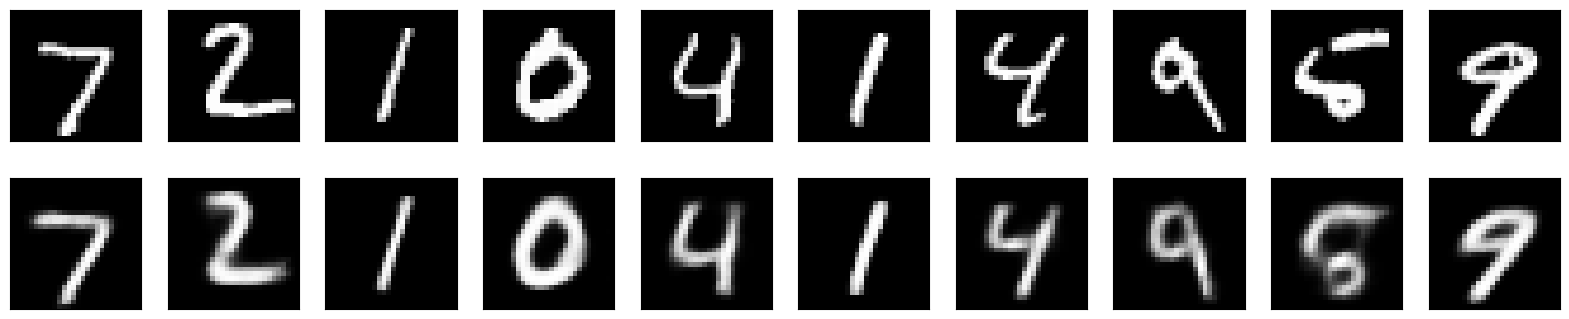

In [25]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# 
# 
# 
# The End
# 
# 
# 